In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

#read csv file
df = pd.read_csv('housing affordability.csv',delimiter=None, quotechar="'")


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64535 entries, 0 to 64534
Data columns (total 99 columns):
CONTROL                64535 non-null int64
AGE1                   64535 non-null int64
METRO3                 64535 non-null int64
REGION                 64535 non-null int64
LMED                   64535 non-null int64
FMR                    64535 non-null int64
L30                    64535 non-null int64
L50                    64535 non-null int64
L80                    64535 non-null int64
IPOV                   64535 non-null int64
BEDRMS                 64535 non-null int64
BUILT                  64535 non-null int64
STATUS                 64535 non-null int64
TYPE                   64535 non-null int64
VALUE                  64535 non-null int64
VACANCY                64535 non-null int64
TENURE                 64535 non-null int64
NUNITS                 64535 non-null int64
ROOMS                  64535 non-null int64
WEIGHT                 64535 non-null float64
PER      

Data wrangling to remove outliers, fill missing values
We used quotechar to remove the single quotes from the data 
Remove all duplicate columns with formatted data (starts with 'FMT')

In [3]:
#Remove all columns starting with 'FMT'
df = df.drop(df.filter(regex='FMT').columns, axis=1)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64535 entries, 0 to 64534
Data columns (total 74 columns):
CONTROL             64535 non-null int64
AGE1                64535 non-null int64
METRO3              64535 non-null int64
REGION              64535 non-null int64
LMED                64535 non-null int64
FMR                 64535 non-null int64
L30                 64535 non-null int64
L50                 64535 non-null int64
L80                 64535 non-null int64
IPOV                64535 non-null int64
BEDRMS              64535 non-null int64
BUILT               64535 non-null int64
STATUS              64535 non-null int64
TYPE                64535 non-null int64
VALUE               64535 non-null int64
VACANCY             64535 non-null int64
TENURE              64535 non-null int64
NUNITS              64535 non-null int64
ROOMS               64535 non-null int64
WEIGHT              64535 non-null float64
PER                 64535 non-null int64
ZINC2               64535 no

In [5]:
# Data cleaning
# Remove missing values and negative values for AGE and home value
#Use fillna method for ZINC2
df.loc[df.VALUE < 25000 ] =np.nan
df.loc[df.VALUE > 600000 ] =np.nan
df.loc[df.AGE1 <5]=np.nan
df.loc[df.ZINC2 < 1000] =np.nan
df.ZINC2 = df.ZINC2.fillna(method='ffill').fillna(method ='bfill')

df=df[df['VALUE'].notnull()]
df=df[df['AGE1'].notnull()]



In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31595 entries, 0 to 64521
Data columns (total 74 columns):
CONTROL             31595 non-null float64
AGE1                31595 non-null float64
METRO3              31595 non-null float64
REGION              31595 non-null float64
LMED                31595 non-null float64
FMR                 31595 non-null float64
L30                 31595 non-null float64
L50                 31595 non-null float64
L80                 31595 non-null float64
IPOV                31595 non-null float64
BEDRMS              31595 non-null float64
BUILT               31595 non-null float64
STATUS              31595 non-null float64
TYPE                31595 non-null float64
VALUE               31595 non-null float64
VACANCY             31595 non-null float64
TENURE              31595 non-null float64
NUNITS              31595 non-null float64
ROOMS               31595 non-null float64
WEIGHT              31595 non-null float64
PER                 31595 non-n

In [6]:
#Check if there are any null values
df.isnull().sum()

CONTROL             0
AGE1                0
METRO3              0
REGION              0
LMED                0
FMR                 0
L30                 0
L50                 0
L80                 0
IPOV                0
BEDRMS              0
BUILT               0
STATUS              0
TYPE                0
VALUE               0
VACANCY             0
TENURE              0
NUNITS              0
ROOMS               0
WEIGHT              0
PER                 0
ZINC2               0
ZADEQ               0
ZSMHC               0
STRUCTURETYPE       0
OWNRENT             0
UTILITY             0
OTHERCOST           0
COST06              0
COST12              0
                   ..
INCRELAMIPCT        0
INCRELAMICAT        0
INCRELPOVPCT        0
INCRELPOVCAT        0
INCRELFMRPCT        0
INCRELFMRCAT        0
COST06RELAMIPCT     0
COST06RELAMICAT     0
COST06RELPOVPCT     0
COST06RELPOVCAT     0
COST06RELFMRPCT     0
COST06RELFMRCAT     0
COST08RELAMIPCT     0
COST08RELAMICAT     0
COST08RELP

EDA --Exploratory Data Analyis

C:\Users\GG\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


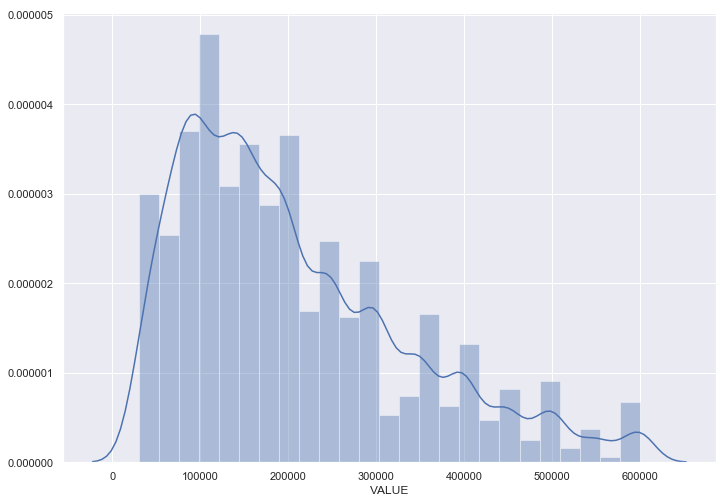

count     31595.00
mean     206751.07
std      131449.69
min       30000.00
25%      100000.00
50%      180000.00
75%      280000.00
max      600000.00
Name: VALUE, dtype: float64

In [7]:
# Value of the house--log scale used for better visualization of the distribution

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(df['VALUE'], bins=25)
plt.show()
df.VALUE.describe().round(2)

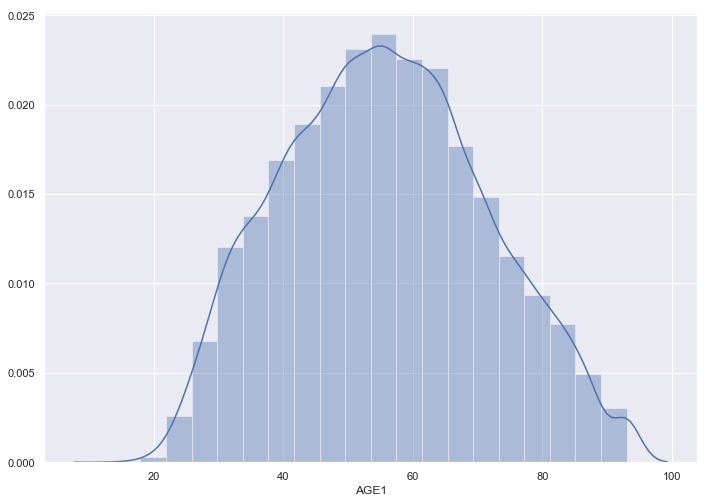

count    31595.00
mean        55.71
std         15.76
min         14.00
25%         44.00
50%         55.00
75%         67.00
max         93.00
Name: AGE1, dtype: float64

In [198]:
#Histogram of head of household age

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(df['AGE1'], bins=20)
plt.show()
df.AGE1.describe().round(2)

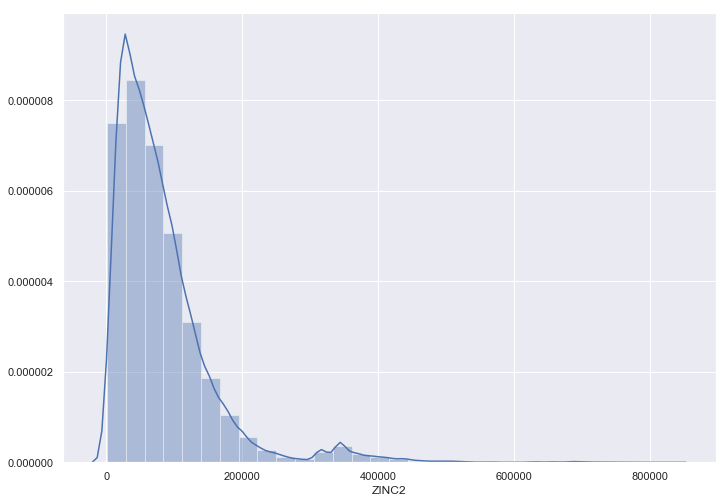

count     31595.00
mean      82133.84
std       74060.81
min        1000.00
25%       33650.00
50%       63987.00
75%      104987.00
max      831203.00
Name: ZINC2, dtype: float64

In [199]:
#Household income --log scale used to study the distribution
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(df['ZINC2'], bins=30)
plt.show()
df.ZINC2.describe().round(2)

,count,mean,std,min,25%,50%,75%,max
METRO3,,,,,,,,
1.0,7095.0,200049.33,135983.55,30000.0,100000.0,160000.0,280000.0,600000.0
2.0,13343.0,232889.90,136486.63,30000.0,130000.0,200000.0,320000.0,600000.0
3.0,4784.0,210006.27,123674.41,30000.0,120000.0,180000.0,280000.0,600000.0
4.0,1970.0,150685.28,96539.34,30000.0,80000.0,130000.0,200000.0,600000.0
5.0,4403.0,159886.44,105864.76,30000.0,80000.0,130000.0,200000.0,600000.0


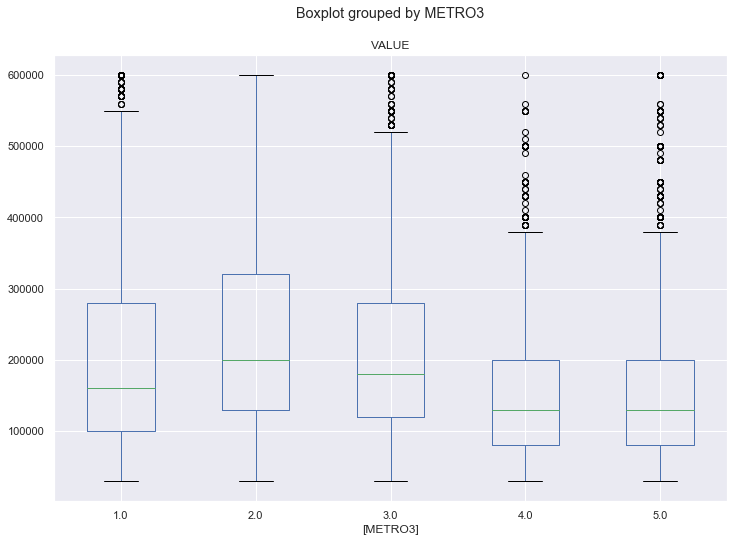

In [8]:
# Boxplot of Value based on METRO data. 1=Central City, 2-5=subarban areas (2=closer to cenral city)
# Univariate analysis of the Response data - bar plot
df.boxplot(column=['VALUE'],by = ['METRO3'])
df.VALUE.groupby(df.METRO3).describe().round(2)

,count,mean,std,min,25%,50%,75%,max
REGION,,,,,,,,
1.0,7728.0,262255.43,139491.39,30000.0,150000.0,250000.0,350000.0,600000.0
2.0,9457.0,167287.72,107528.93,30000.0,90000.0,140000.0,210000.0,600000.0
3.0,9701.0,176431.30,115719.47,30000.0,90000.0,150000.0,230000.0,600000.0
4.0,4709.0,257377.36,143399.16,30000.0,150000.0,230000.0,350000.0,600000.0


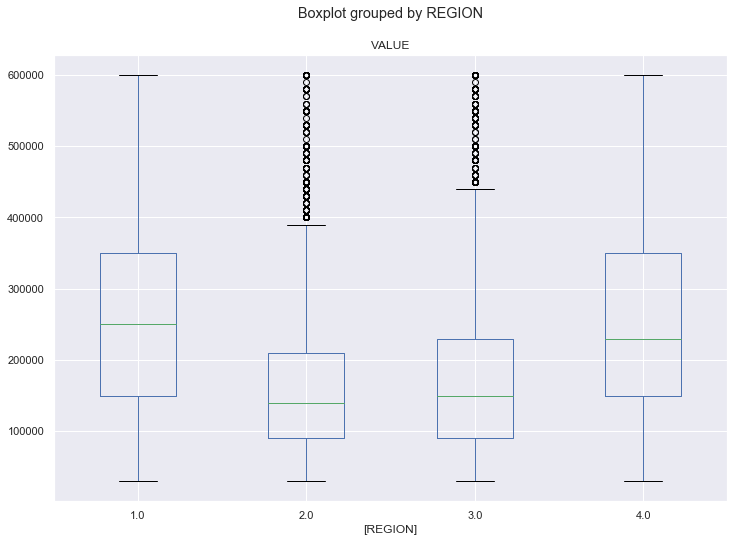

In [201]:
# Boxplot of Value based on REGION data (1=North East, 2=Mid West, 3=South, 4=West)
# Univariate analysis of the Response data - bar plot
df.boxplot(column=['VALUE'],by = ['REGION'])
df.VALUE.groupby(df.REGION).describe().round(2)

Dimension reduction using feature selection

In [9]:
# Correlation matrix
# Remove dependent variable and all the nan variable
df1 =df.loc[:,'AGE1':'BURDEN']
df1=df1.drop(['VALUE','STATUS', 'VACANCY', 'TENURE', 'OWNRENT', 'ASSISTED'], axis=1)
df1.corr().round(2)

,AGE1,METRO3,REGION,LMED,FMR,L30,L50,L80,IPOV,BEDRMS,...,GLMED,GL30,GL50,GL80,APLMED,ABL30,ABL50,ABL80,ABLMED,BURDEN
AGE1,1.00,0.05,-0.02,-0.02,-0.06,-0.26,-0.26,-0.29,-0.43,-0.11,...,-0.02,-0.26,-0.26,-0.29,-0.26,-0.06,-0.06,-0.07,-0.07,0.07
METRO3,0.05,1.00,0.08,-0.43,-0.39,-0.35,-0.35,-0.36,-0.05,0.00,...,-0.43,-0.35,-0.35,-0.36,-0.33,-0.38,-0.38,-0.41,-0.36,-0.04
REGION,-0.02,0.08,1.00,-0.42,-0.04,-0.28,-0.28,-0.25,-0.00,0.03,...,-0.42,-0.28,-0.28,-0.25,-0.31,-0.32,-0.32,-0.29,-0.34,-0.02
LMED,-0.02,-0.43,-0.42,1.00,0.64,0.71,0.71,0.62,0.06,0.03,...,1.00,0.71,0.71,0.62,0.76,0.82,0.82,0.73,0.86,0.05
FMR,-0.06,-0.39,-0.04,0.64,1.00,0.68,0.68,0.64,0.23,0.46,...,0.64,0.68,0.68,0.64,0.62,0.88,0.88,0.86,0.79,0.04
L30,-0.26,-0.35,-0.28,0.71,0.68,1.00,1.00,0.98,0.68,0.23,...,0.71,1.00,1.00,0.98,0.97,0.76,0.76,0.73,0.72,-0.01
L50,-0.26,-0.35,-0.28,0.71,0.68,1.00,1.00,0.98,0.68,0.23,...,0.71,1.00,1.00,0.98,0.97,0.76,0.76,0.73,0.72,-0.01
L80,-0.29,-0.36,-0.25,0.62,0.64,0.98,0.98,1.00,0.75,0.25,...,0.62,0.98,0.98,1.00,0.94,0.70,0.70,0.71,0.65,-0.01
IPOV,-0.43,-0.05,-0.00,0.06,0.23,0.68,0.68,0.75,1.00,0.35,...,0.06,0.68,0.68,0.75,0.67,0.23,0.23,0.26,0.22,-0.06
BEDRMS,-0.11,0.00,0.03,0.03,0.46,0.23,0.23,0.25,0.35,1.00,...,0.03,0.23,0.23,0.25,0.26,0.52,0.52,0.59,0.53,-0.02


The correlation coefficient ranges from -1 to 1. If the value is close to 1, it means that there is a strong positive correlation between the two variables. When it is close to -1, the variables have a strong negative correlation

In [10]:
#Drop variables with high correlation
df2 =df1.drop(['L30','L50', 'L80',  'COST06', 'COST08','COST12', 'GL30','GL50', 'GL80', 'ABL30',
              'ABL50','ABL80','TOTSAL', 'APLMED','ABLMED','GLMED','COSTMED', 'PER','TYPE'], axis=1)


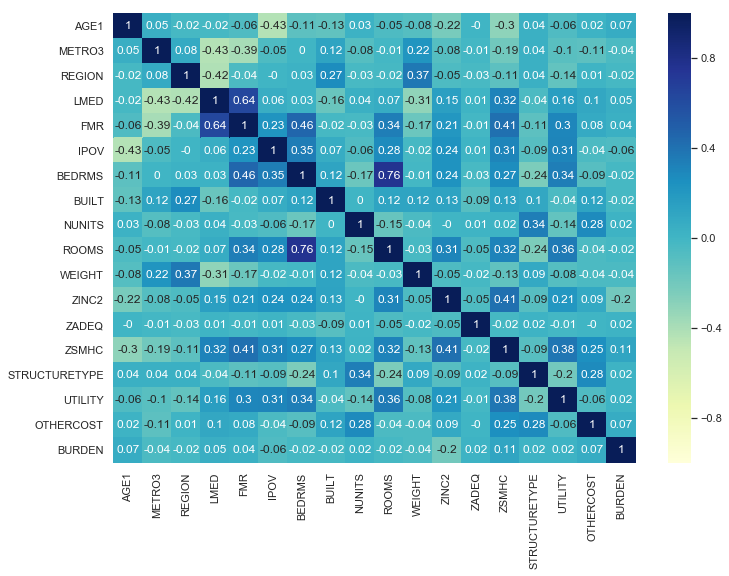

In [11]:
#Correlation matrix to check for correlation between variables

correlation_matrix = df2.corr().round(2)

# annot = True to print the values inside the square

sns.heatmap(data=correlation_matrix, annot=True, vmin= -1, vmax =1, center=0.0, cmap="YlGnBu")

In [12]:
# Dimension reduction using feature selection
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=1, max_depth=10)
df2=pd.get_dummies(df2)
model.fit(df2,df.VALUE)

C:\Users\GG\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

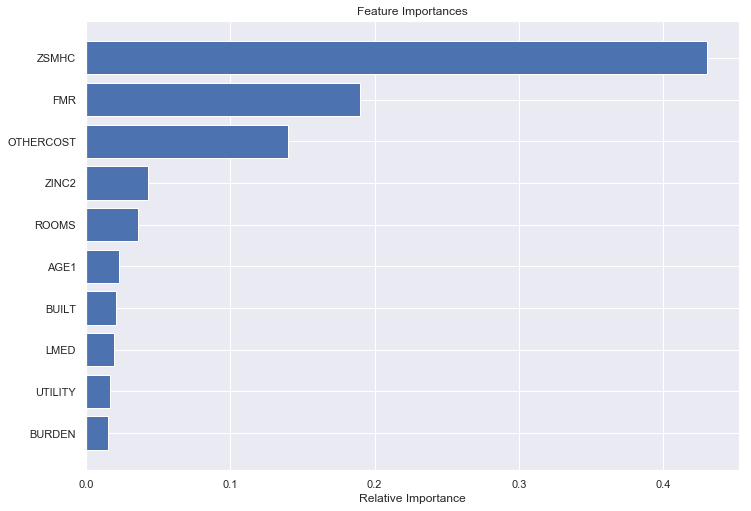

In [13]:
#plot feature importance
features = df2.columns
importances = model.feature_importances_
indices = np.argsort(importances)[-10:]  # top 10 features
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

C:\Users\GG\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()


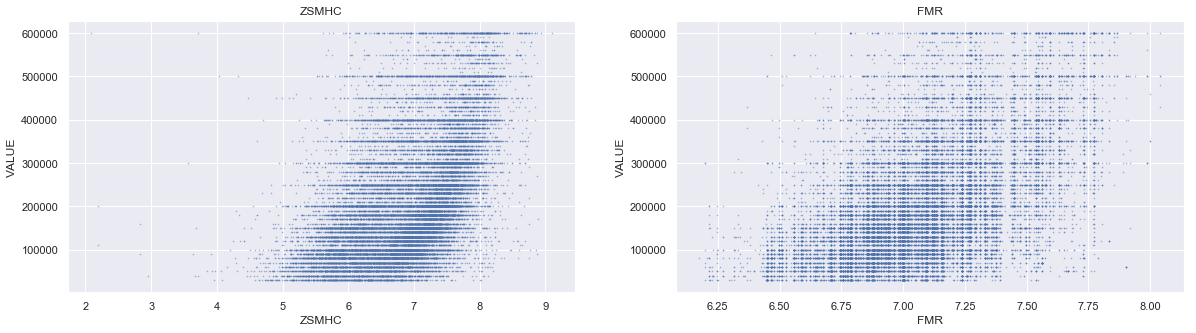

In [87]:
#Scatter plots for 
# VALUE v. Monthly hosung costs (ZSMHC)
# VALUE v. Fair Market Rent
plt.figure(figsize=(20, 5))
features = ['ZSMHC','FMR']
target = df['VALUE']
for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = df[col]
    y = target
    plt.scatter(np.log(x), y, marker='o', alpha=0.5, s=0.3)
    #plt.scatter(np.log(x), np.sqrt(y), marker='o', alpha=0.3, s=0.15)
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('VALUE')

C:\Users\GG\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()


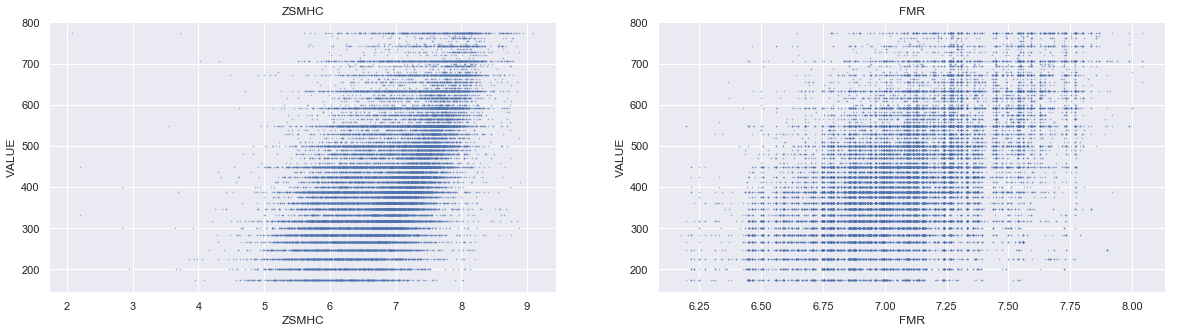

In [88]:
#Scatter plots same as above but taking sqrt of y to make it linear
# VALUE v. Monthly hosung costs (ZSMHC)
# VALUE v. Fair Market Rent
plt.figure(figsize=(20, 5))
features = ['ZSMHC','FMR']
target = df['VALUE']
for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = df[col]
    y = target
    plt.scatter(np.log(x), np.sqrt(y), marker='o', alpha=0.5, s=0.3)
   
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('VALUE')

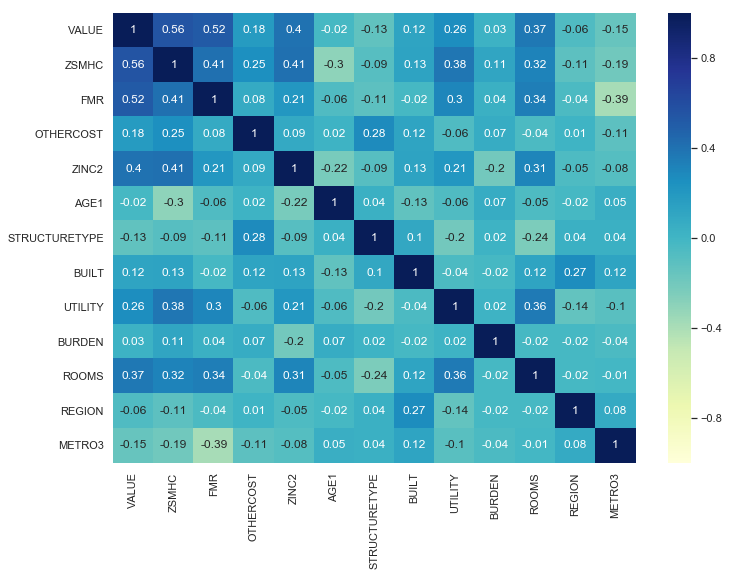

In [14]:
#Correlation matrix to check for correlation between variables
df3 =df[['VALUE','ZSMHC','FMR', 'OTHERCOST','ZINC2','AGE1','STRUCTURETYPE', 'BUILT','UTILITY',  'BURDEN','ROOMS','REGION',
         'METRO3' ]]

correlation_matrix = df3.corr().round(2)

# annot = True to print the values inside the square

sns.heatmap(data=correlation_matrix, annot=True, vmin= -1, vmax =1, center=0.0, cmap="YlGnBu")

Machine Learning Algorithms

In [15]:
# Data splitting into training and testing sets
from sklearn.model_selection import train_test_split

X =pd.DataFrame(df[['ZSMHC','FMR', 'OTHERCOST','ZINC2','STRUCTURETYPE', 'UTILITY','BURDEN','ROOMS', 'METRO3','REGION']])
Y = df['VALUE']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state=1)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(23696, 10)
(7899, 10)
(23696,)
(7899,)


Linear Regression model

In [16]:
# Linear Regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [17]:
# Check model with R square and RSME
# model evaluation for training set
from sklearn.metrics import r2_score

y_train_predict = lin_model.predict(X_train)
rmse1 = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse1))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
rmse2 = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse2))
print('R2 score is {}'.format(r2))
print('\n')
print('------------------------------------')
delta_RSME =rmse2-rmse1
print("Delta RSME {}".format(round(delta_RSME),0))

The model performance for training set
--------------------------------------
RMSE is 95400.02829334939
R2 score is 0.4707616536548612


The model performance for testing set
--------------------------------------
RMSE is 97966.52356607039
R2 score is 0.4522767341151467


------------------------------------
Delta RSME 2566.0


In [18]:
from sklearn.model_selection import train_test_split

X1 =pd.DataFrame(df[['ZSMHC','FMR', 'OTHERCOST','ZINC2']]) #,'STRUCTURETYPE', 'UTILITY','BURDEN','ROOMS']])
Y1 =df['VALUE']

X_train_imp, X_test_imp, Y_train_imp, Y_test_imp = train_test_split(X1, Y1, test_size = 0.25, random_state=5)

print(X_train_imp.shape)
print(X_test_imp.shape)
print(Y_train_imp.shape)
print(Y_test_imp.shape)

(23696, 4)
(7899, 4)
(23696,)
(7899,)


In [170]:
#improvised linear model
lin_model_imp = LinearRegression()
lin_model_imp.fit(X_train_imp, Y_train_imp)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [171]:
y_train_predict_imp = lin_model_imp.predict(X_train_imp)
rmse1 = (np.sqrt(mean_squared_error(Y_train_imp, y_train_predict_imp)))
r2 = r2_score(Y_train_imp, y_train_predict_imp)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict_imp = lin_model_imp.predict(X_test_imp)
rmse2 = (np.sqrt(mean_squared_error(Y_test_imp, y_test_predict_imp)))
r2 = r2_score(Y_test_imp, y_test_predict_imp)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print('\n')
print('------------------------------------')
delta_RSME =rmse2-rmse1
print("Delta RSME {}".format(round(delta_RSME),0))

The model performance for training set
--------------------------------------
RMSE is 97859.89539123501
R2 score is 0.44623695439997335


The model performance for testing set
--------------------------------------
RMSE is 97859.89539123501
R2 score is 0.44813359874819203


------------------------------------
Delta RSME 117.0


Support Vector Machines

In [31]:
#Support vector Regressor (SVR) does not work
from sklearn.svm import SVR
#X1 =df[['ZSMHC', 'FMR']]#,'FMR', 'OTHERCOST','ZINC2','STRUCTURETYPE', 'UTILITY','BURDEN','ROOMS']])
#Y1 = df['VALUE']

#X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size = 0.25, random_state=5)
#svr_linear = SVR(kernel='linear', C=100, gamma='auto')
#svr_linear.fit(X1_train, Y1_train)

In [ ]:
# Check model with R square and RSME
# model evaluation for training set
#from sklearn.metrics import r2_score

#y_train_predict = svr_linear.predict(X_train)
#rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
#r2 = r2_score(Y_train, y_train_predict)

#print("The model performance for training set")
#print("--------------------------------------")
#print('RMSE is {}'.format(rmse))
#print('R2 score is {}'.format(r2))
#print("\n")

# model evaluation for testing set
#y_test_predict = svr_linear.predict(X_test)
#rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
#r2 = r2_score(Y_test, y_test_predict)

#print("The model performance for testing set")
#print("--------------------------------------")
#print('RMSE is {}'.format(rmse))
#print('R2 score is {}'.format(r2))

K Nearest Neighbor Regression

In [172]:
from sklearn.neighbors import KNeighborsRegressor
KNN_model = KNeighborsRegressor(n_neighbors=7)
KNN_model.fit(X_train, Y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=7, p=2,
          weights='uniform')

In [173]:
y_train_predict = KNN_model.predict(X_train)
rmse1 = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = KNN_model.predict(X_test)
rmse2 = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print('\n')
print('------------------------------------')
delta_RSME =rmse2-rmse1
print("Delta RSME {}".format(round(delta_RSME),0))

The model performance for training set
--------------------------------------
RMSE is 97859.89539123501
R2 score is 0.5405253286205532


The model performance for testing set
--------------------------------------
RMSE is 97859.89539123501
R2 score is 0.36221740600718644


------------------------------------
Delta RSME 16824.0


In [174]:
# RandomizedSearchCV for Hyperparameter finetuning
# Import necessary modules
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV 

# Setup the parameters and distributions to sample from: param_dist
param_dist = {"leaf_size": randint(2,12),
              "n_neighbors": randint(1, 12),
                "p": randint(2,11)        }

# Instantiate a Decision Tree classifier: tree
KNN_CV = KNeighborsRegressor()

# Instantiate the RandomizedSearchCV object: tree_cv
knn_cv = RandomizedSearchCV(KNN_CV, param_dist, cv=5)

# Fit it to the data
knn_cv.fit(X_train,Y_train)

# Print the tuned parameters and score
print("Tuned KNN Parameters: {}".format(knn_cv.best_params_))
print("Best score is {}".format(knn_cv.best_score_))


Tuned KNN Parameters: {'leaf_size': 7, 'n_neighbors': 11, 'p': 4}
Best score is 0.3877268523600951


In [175]:
#KNN model tuning 
from sklearn.neighbors import KNeighborsRegressor
KNN_model_CV = KNeighborsRegressor(n_neighbors=11, p=4, leaf_size=7)
KNN_model_CV.fit(X_train, Y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=7, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=11, p=4,
          weights='uniform')

In [176]:
y_train_predict = KNN_model_CV.predict(X_train)
rmse1 = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = KNN_model_CV.predict(X_test)
rmse2 = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print('\n')
print('------------------------------------')
delta_RSME =rmse2-rmse1
print("Delta RSME {}".format(round(delta_RSME),0))

The model performance for training set
--------------------------------------
RMSE is 97859.89539123501
R2 score is 0.4981020312765547


The model performance for testing set
--------------------------------------
RMSE is 97859.89539123501
R2 score is 0.3836329642266454


------------------------------------
Delta RSME 11021.0


Random Forest Regression

In [177]:
# Random Forest Regressor for model fit
from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


random_forest_model = RandomForestRegressor(random_state=1, max_depth=10)
random_forest_model.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

In [178]:
# Check model with R square and RSME for RandomForestRegressor
# model evaluation for training set
from sklearn.metrics import r2_score

y_train_predict = random_forest_model.predict(X_train)
rmse1 = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse1))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = random_forest_model.predict(X_test)
rmse2 = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse2))
print('R2 score is {}'.format(r2))
print('\n')
print('------------------------------------')
delta_RSME =rmse2-rmse1
print("Delta RSME {}".format(round(delta_RSME),0))

The model performance for training set
--------------------------------------
RMSE is 75228.69404525145
R2 score is 0.6709049560671283


The model performance for testing set
--------------------------------------
RMSE is 90037.59393692871
R2 score is 0.5373489449753852


------------------------------------
Delta RSME 14809.0


Random Forest Classifier has better R2 scores compared to linear model. We see that data was not lieanr from scatter plots VALUE v. independent variables showed non linear exponential relatioship.
RSME scores are high for both linear and Random Forest models.
In order to minimize the overfitting, cross validation of the training dataset will be done.

In [179]:
# RandomizedSearchCV for Hyperparameter finetuning
# Import necessary modules
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV 

# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": randint(2,11),
              "max_features": randint(2,9),
              "min_samples_leaf":randint(2,11),
              "n_estimators":[10,50,100,200]}

# Instantiate a Decision Tree classifier: tree
tree = RandomForestRegressor()

# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(tree, param_dist, cv=5)

# Fit it to the data
tree_cv.fit(X_train,Y_train)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))


Tuned Decision Tree Parameters: {'max_depth': 9, 'max_features': 4, 'min_samples_leaf': 6, 'n_estimators': 100}
Best score is 0.5578620806346096


In [141]:
tree_cv.cv_results_

{'mean_fit_time': array([1.88765225, 2.88140893, 0.39064221, 2.41264958, 2.91269202,
        1.91573176, 1.88773618, 2.43137221, 0.91568632, 2.1532383 ]),
 'std_fit_time': array([2.69358397e-02, 1.59339616e-02, 5.75029631e-05, 2.12124570e-02,
        5.56719658e-02, 6.05902412e-02, 1.80657749e-02, 7.63611127e-03,
        1.25045560e-02, 1.53286843e-02]),
 'mean_score_time': array([0.03125153, 0.03124814, 0.003125  , 0.02187004, 0.03124924,
        0.03124409, 0.03437247, 0.02500219, 0.003125  , 0.0281147 ]),
 'std_score_time': array([7.94560097e-06, 5.09122765e-07, 6.25000000e-03, 7.64946026e-03,
        1.12379907e-05, 1.42073469e-05, 6.25043833e-03, 7.64934280e-03,
        6.25000000e-03, 6.25546394e-03]),
 'param_n_estimators': masked_array(data=[100, 100, 10, 50, 100, 100, 100, 50, 50, 100],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'param_min_samples_leaf': mas

In [23]:
# Random Forest Regressor for model fit
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


random_forest_model = RandomForestRegressor(n_estimators = 100,random_state=1, max_depth=9, 
                                            max_features=4, min_samples_leaf=6)
random_forest_model.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,
           max_features=4, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=6,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=1,
           verbose=0, warm_start=False)

In [24]:
y_train_predict = random_forest_model.predict(X_train)
rmse1 = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse1))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict_RM = random_forest_model.predict(X_test)
rmse2 = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse2))
print('R2 score is {}'.format(r2))
print('\n')
print('------------------------------------')
delta_RSME =rmse2-rmse1
print("Delta RSME {}".format(round(delta_RSME),0))

The model performance for training set
--------------------------------------
RMSE is 80934.65843067525
R2 score is 0.619089123926813


The model performance for testing set
--------------------------------------
RMSE is 97966.52356607039
R2 score is 0.4522767341151467


------------------------------------
Delta RSME 17032.0


From the improvised model above with hyper parameter tuning,the random forest regressor is a good model to predict the affordability. With corss vlidation, the overfitting is taken care and is evident with tighter R2 score between test and train data.

In [182]:
# Random Forest Classifer
# TODO: Import 'r2_score'
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true, y_predict)
    
    # Return the score
    return score

# TODO: Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer
# from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.cross_validation import ShuffleSplit


def fit_model3(X, y,params):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    # sklearn version 0.18: ShuffleSplit(n_splits=10, test_size=0.1, train_size=None, random_state=None)
    # sklearn versiin 0.17: ShuffleSplit(n, n_iter=10, test_size=0.1, train_size=None, random_state=None)
    cv_sets = ShuffleSplit(X.shape[0], n_iter=3, test_size = 0.2,  random_state = 0)

    # TODO: Create a decision tree regressor object
    regressor = RandomForestClassifier(random_state = 0)

    # TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    # change the number of trees for random forest
    #params = {'max_depth':range(1,11), 'max_features':[ 2 , 6, 10]}

    # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # TODO: Create the grid search cv object --> GridSearchCV()
    # Make sure to include the right parameters in the object:
    # (estimator, param_grid, scoring, cv) which have values 'regressor', 'params', 'scoring_fnc', and 'cv_sets' respectively.
    grid = GridSearchCV(regressor, params, scoring_fnc, cv=cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)
    #   print "Parameter 'max_depth' is {} for the optimal model.".format(grid.get_params() )

    # Return the optimal model after fitting the data
    return grid #.best_estimator_

In [183]:
grid_param_11 =[12,11,10,9,8,7,6,5,4,3,2]  
grid_param_22 = [100,50,10]

params1 = { 'max_depth':grid_param_11,'n_estimators':grid_param_22 } 
results3 = fit_model3(X_train,Y_train,params1)

#print(results2.cv_results_)

In [184]:
results3.cv_results_['mean_train_score']


C:\Users\GG\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


array([0.70924034, 0.69765763, 0.616037  , 0.64646718, 0.63862968,
       0.56800234, 0.58510132, 0.58066383, 0.5265915 , 0.54511859,
       0.54184831, 0.49615561, 0.51057705, 0.51040357, 0.48141894,
       0.48941291, 0.48711667, 0.46375441, 0.47507067, 0.46023777,
       0.43189473, 0.45805113, 0.45178042, 0.43600733, 0.41820878,
       0.40886943, 0.39251848, 0.37372649, 0.36232593, 0.35583032,
       0.29009577, 0.28289566, 0.30274499])

C:\Users\GG\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


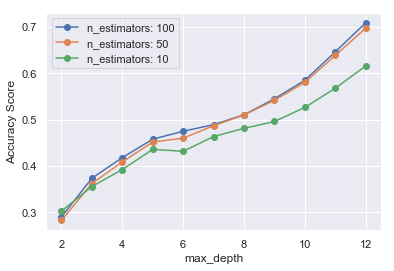

In [191]:
scores_mean3 = results3.cv_results_['mean_train_score']
scores_mean3 = np.array(scores_mean3).reshape(len(grid_param_11),len(grid_param_22))
for idx, val in enumerate(grid_param_22):
    plt.plot(grid_param_11, scores_mean3[:,idx],   '-o', label = 'n_estimators' + ': ' + str(val) )
plt.xlabel('max_depth')
plt.ylabel('Accuracy Score')
plt.legend()#loc='center left', bbox_to_anchor=(1.0, 0.5))

In [194]:
# Random Forest Regressor for model fit
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


random_forest_model_GSCV = RandomForestRegressor(n_estimators = 50,random_state=1, max_depth=7, 
                                            )
random_forest_model_GSCV.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=7,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

In [195]:
y_train_predict = random_forest_model_GSCV.predict(X_train)
rmse1 = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse1))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = random_forest_model_GSCV.predict(X_test)
rmse2 = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse2))
print('R2 score is {}'.format(r2))
print('\n')
print('------------------------------------')
delta_RSME =rmse2-rmse1
print("Delta RSME {}".format(round(delta_RSME),0))

The model performance for training set
--------------------------------------
RMSE is 85164.99669953062
R2 score is 0.5782291463862497


The model performance for testing set
--------------------------------------
RMSE is 91118.63814353262
R2 score is 0.5261725297602311


------------------------------------
Delta RSME 5954.0


Dense Neural Networks model using Keras

In [22]:
# Sequential model 
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Activation

model = Sequential([
    Dense(32, input_shape=(784,)),
    Activation('relu'),
    Dense(10),
    Activation('softmax'),
])

ModuleNotFoundError: No module named 'tensorflow'